<a href="https://colab.research.google.com/github/NishaGanesan05/rd-infrotech-task1-6/blob/main/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       895
        True       1.00      1.00      1.00       112

    accuracy                           1.00      1007
   macro avg       1.00      1.00      1.00      1007
weighted avg       1.00      1.00      1.00      1007



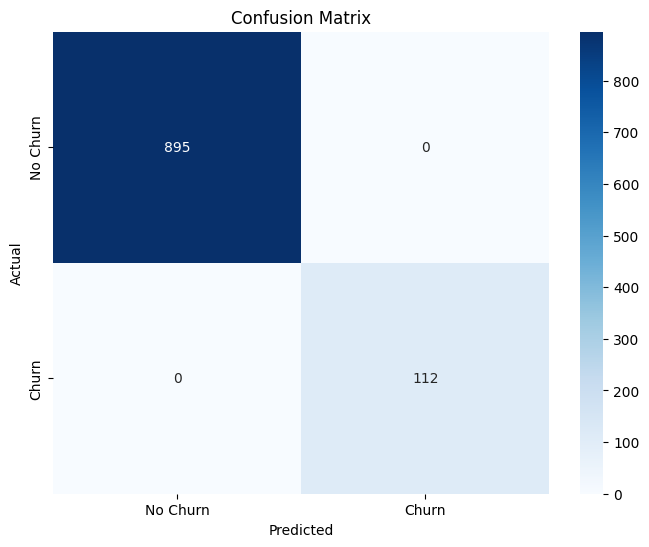

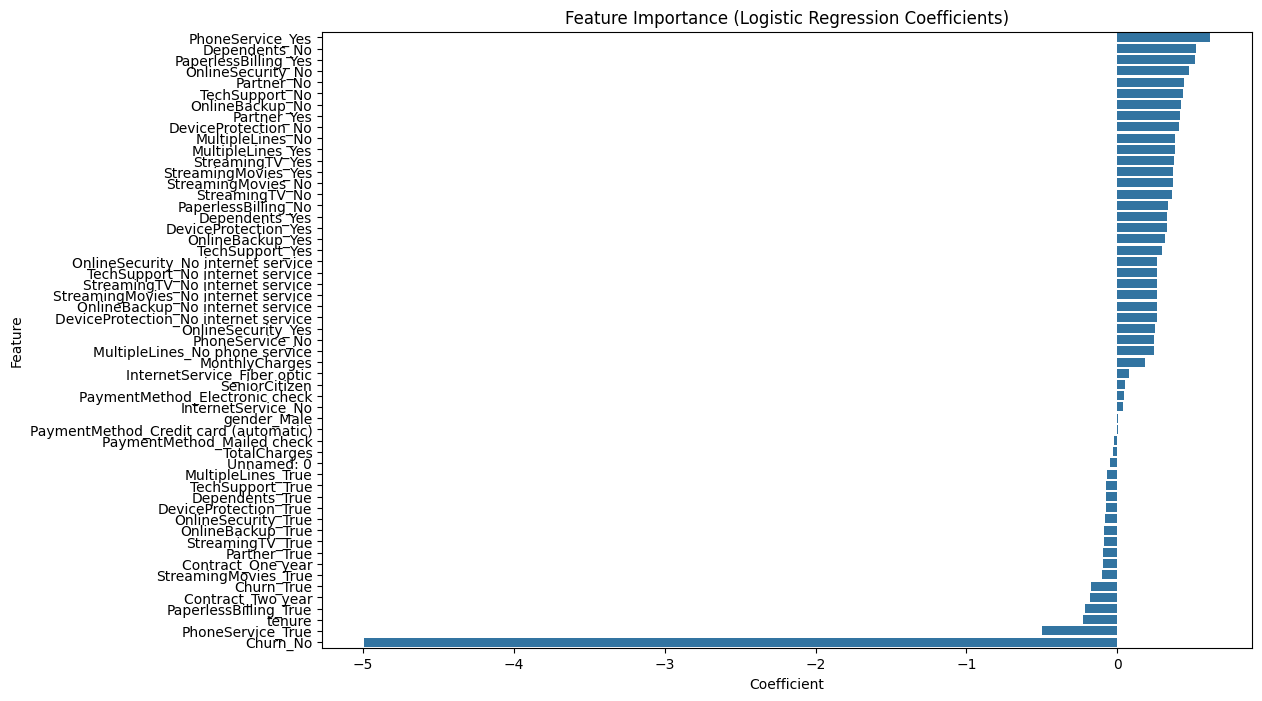


Top 10 Factors Influencing Churn:
                 Feature  Coefficient
14      PhoneService_Yes     0.613943
9          Dependents_No     0.523815
49  PaperlessBilling_Yes     0.513213
21     OnlineSecurity_No     0.473328
6             Partner_No     0.443446
33        TechSupport_No     0.439773
25       OnlineBackup_No     0.422892
8            Partner_Yes     0.414541
29   DeviceProtection_No     0.410774
15      MultipleLines_No     0.386568

High-Value Customers at Risk of Churning:
      MonthlyCharges  tenure          LTV
3005          104.70      39  4590.179839
3050          106.05      66  7868.157066
3105           99.20      40  4460.567091
3111           85.50      47  4517.335901
3127          118.35      67  8913.771098


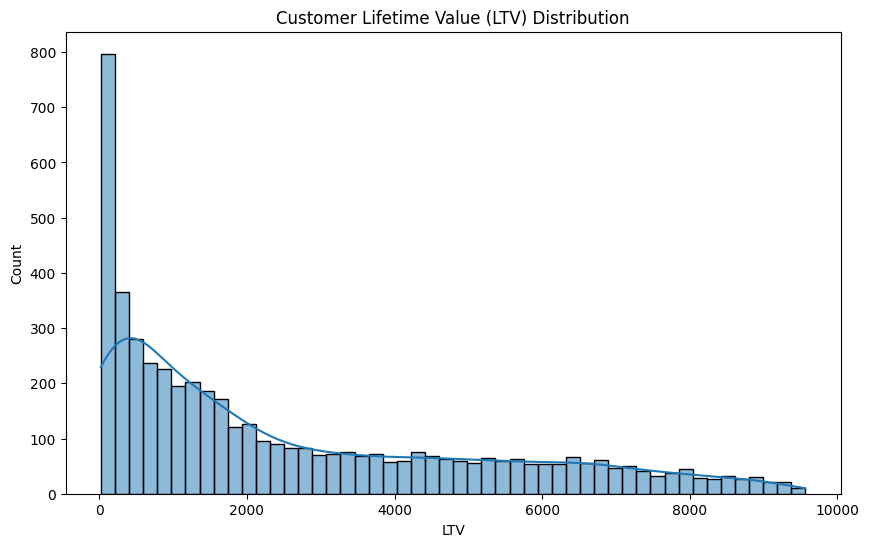

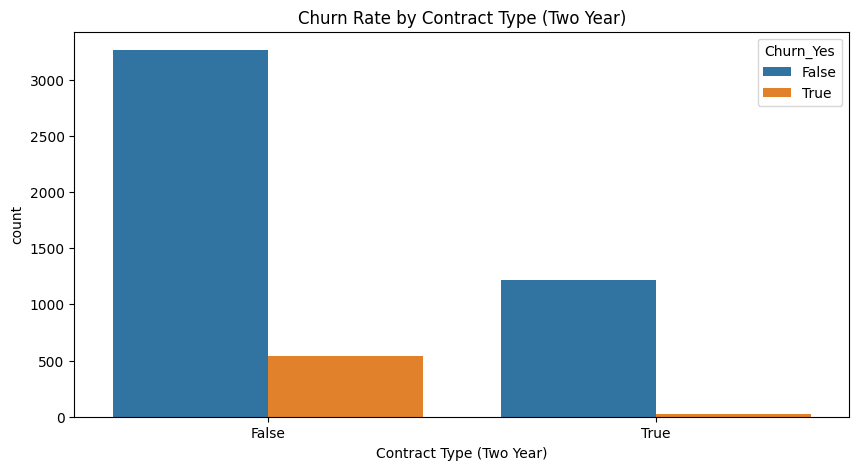

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
url = "https://github.com/KimathiNewton/Telco-Customer-Churn/raw/master/Datasets/telco_churn.csv"
data = pd.read_csv(url)

# Data Preprocessing
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(subset=['TotalCharges'], inplace=True)

# Convert 'SeniorCitizen' to binary format (0 and 1) if needed
data['SeniorCitizen'] = data['SeniorCitizen'].replace({'True': 1, 'False': 0}).astype(int)

# Drop irrelevant columns
data.drop(['customerID'], axis=1, inplace=True)

# Encode categorical variables using one-hot encoding
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split the data into features and target variable
X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Model Prediction and Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance (Logistic Regression Coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

# Identifying Key Factors Influencing Churn
print("\nTop 10 Factors Influencing Churn:")
print(feature_importance.head(10))

# Lifetime Value (LTV) Calculation
data['MonthlyRevenue'] = data['MonthlyCharges']
data['LTV'] = data['MonthlyRevenue'] * data['tenure'] / (1 - y.mean())  # Average churn rate

# Identify High-Value Customers at Risk of Churning
high_value_at_risk = data[(data['LTV'] > data['LTV'].quantile(0.75)) & (data['Churn_Yes'] == 1)]
print("\nHigh-Value Customers at Risk of Churning:")
print(high_value_at_risk[['MonthlyCharges', 'tenure', 'LTV']].head())

# Visualizing LTV Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['LTV'], bins=50, kde=True)
plt.title("Customer Lifetime Value (LTV) Distribution")
plt.xlabel("LTV")
plt.show()

# Churn Rate by Contract Type
plt.figure(figsize=(10, 5))
sns.countplot(x='Contract_Two year', hue='Churn_Yes', data=data)
plt.title('Churn Rate by Contract Type (Two Year)')
plt.xlabel('Contract Type (Two Year)')
plt.show()